# Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos), y calcular estadísticas descriptivas de las columnas numéricas.

### 3. Limpieza y Normalización de los Datos

Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes, la inconsistencia en el formato de la columna 'Asistencia', los posibles valores atípicos y la normalización de los nombres de estudiantes y materias a un formato consistente (por ejemplo, capitalización).

### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Esto permite almacenar los datos de forma estructurada para su posterior consulta y uso.



#### 1) Importación del dataset con Pandas

Se carga el archibo csv proporcionado en un dataframe, utilizando la librería de Pandas 

In [1]:
import pandas as pd

df = pd.read_csv('datasets_calificaciones.csv')

#### 2) Exploración de los datos

Llamo al Dataframe y le pido que se muestren las primeras filas del mismo, incluyendo tipos de datos, valores faltantes y estadísticas básicas para ir detectando los posibles problemas ya desde un inicio

In [2]:
df.head(10)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estudiante  100 non-null    object 
 1   Materia     100 non-null    object 
 2   Parcial 1   88 non-null     float64
 3   Parcial 2   88 non-null     float64
 4   Final       85 non-null     float64
 5   Asistencia  100 non-null    object 
dtypes: float64(3), object(3)
memory usage: 4.8+ KB


,Parcial 1,Parcial 2,Final
count,88.000000,88.000000,85.000000
mean,7.831818,7.830682,7.894118
std,1.209877,1.182959,1.206269
min,5.500000,5.800000,5.700000
25%,6.975000,6.875000,7.000000
50%,7.900000,7.700000,7.800000
75%,8.900000,8.900000,9.000000
max,9.900000,9.900000,9.900000


### 3) Limpieza y normalización de los datos:


In [5]:
df['Parcial 1'] = df['Parcial 1'].fillna(df['Parcial 1'].mean())
df['Parcial 2'] = df['Parcial 2'].fillna(df['Parcial 2'].mean())
df['Final'] = df['Final'].fillna(df['Final'].mean())


df['Asistencia'] = df['Asistencia'].str.strip().str.lower()
df['Asistencia'] = df['Asistencia'].replace({'si': 'Sí', 'sí': 'Sí', 'no': 'No'})

df['estudiante'] = df['estudiante'].str.title()
df['Materia'] = df['Materia'].str.title()

#### 4) Obtención de estadísticas descriptivas

Recalculamos estadísticas luego de hacer la limpieza y obtenemops promedios por materia

In [6]:
df.describe()
df.groupby('Materia')[['Parcial 1', 'Parcial 2', 'Final']].mean()

,Parcial 1,Parcial 2,Final
Materia,,,
Ciencias Sociales,9.500000,9.100000,7.894118
Fisica,6.573295,6.849669,6.624755
Historia,7.375000,7.026278,7.482353
Literatura Universal,8.000000,7.800000,8.200000
Matematicas,8.087636,8.261818,8.471059
Programacion Basica,7.831818,5.900000,6.300000
Quimica,9.204167,9.195833,9.027941


#### 5) Visualización de los Datos con Matplotlib
Graficamos histogramas, promedios por materia y relaciones entre calificaciones :)

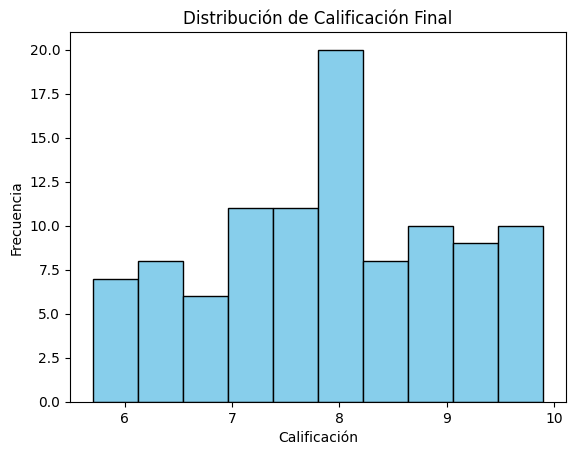

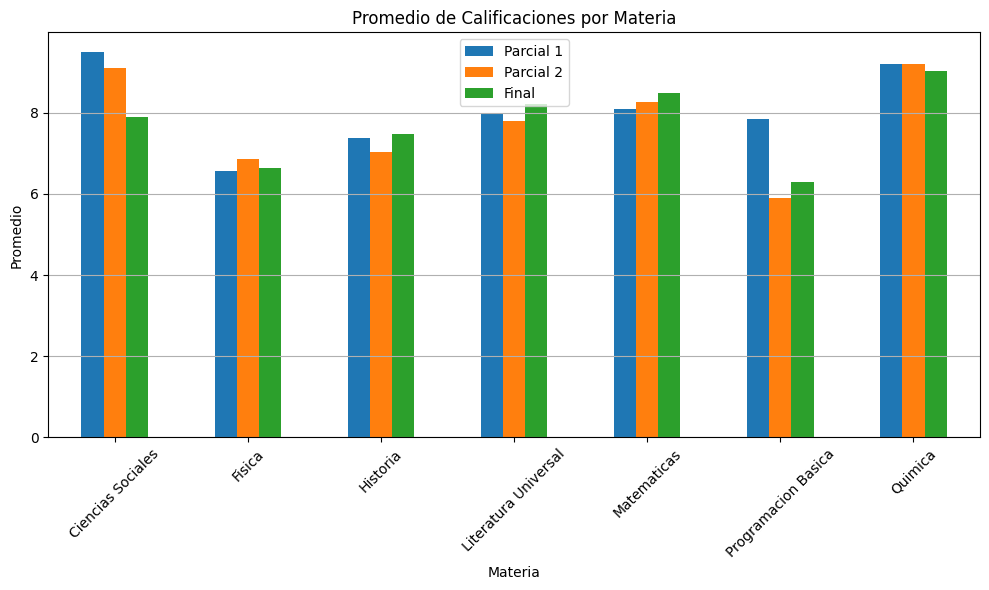

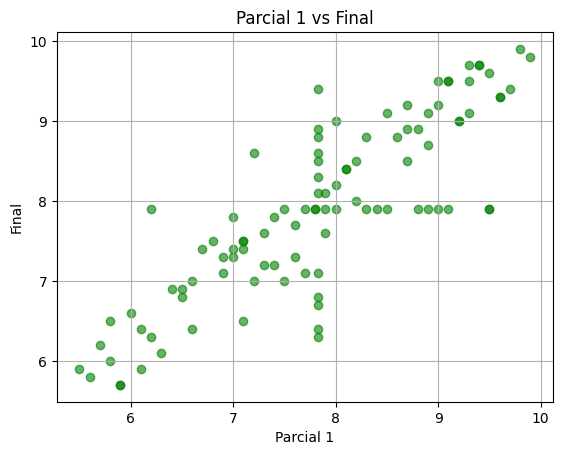

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['Final'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Calificación Final')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

df.groupby('Materia')[['Parcial 1', 'Parcial 2', 'Final']].mean().plot(kind='bar', figsize=(10,6))
plt.title('Promedio de Calificaciones por Materia')
plt.ylabel('Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.scatter(df['Parcial 1'], df['Final'], alpha=0.6, color='green')
plt.title('Parcial 1 vs Final')
plt.xlabel('Parcial 1')
plt.ylabel('Final')
plt.grid(True)
plt.show()


#### 6) Exportación a Archivo SQLite
Para finalizar la tarea, o bueno el modelo, guardamos el DF en una base de datos SQlite para un uso a futuro

In [9]:
import sqlite3

conn = sqlite3.connect('calificaciones.db')
df.to_sql('calificaciones', conn, if_exists='replace', index=False)
conn.close()